In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city = "Springfield"
content = "business"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   384 non-null    object 
 1   name          384 non-null    object 
 2   address       376 non-null    object 
 3   city          384 non-null    object 
 4   state         384 non-null    object 
 5   postal_code   384 non-null    int64  
 6   latitude      384 non-null    float64
 7   longitude     384 non-null    float64
 8   stars         384 non-null    float64
 9   review_count  384 non-null    int64  
 10  is_open       384 non-null    int64  
 11  attributes    358 non-null    object 
 12  categories    384 non-null    object 
 13  hours         314 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 42.1+ KB


In [4]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mglME3E7esPSpIF5bias8w,Pier 1,1014 Baltimore Pike,Springfield,PA,19064,39.915270,-75.342681,2.5,8,0,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","Fashion, Shopping, Department Stores, Furnitur...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
1,p79UR4tdHoJzmhwKmiXa2A,Sport Clips Haircuts of Springfield,400 S State Rd,Springfield,PA,19064,39.938634,-75.355632,2.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hair Salons, Barbers, Beauty & Spas, Men's Hai...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."
2,1o_M5JdOkJJFNj1rIDIlng,The Juice Pod,11 W Woodland Ave,Springfield,PA,19064,39.924933,-75.340216,4.0,19,1,"{'WiFi': ""u'free'"", 'BusinessAcceptsCreditCard...","Food, Juice Bars & Smoothies","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
3,nVI9wI9ujmrutJRMgHKSIg,Fiesta Maya Mexican Grill,1178 Baltimore Pike,Springfield,PA,19064,39.914238,-75.347857,4.5,130,0,"{'BusinessParking': ""{'garage': False, 'street...","Mexican, Restaurants","{'Monday': '10:30-20:0', 'Tuesday': '10:30-20:..."
4,opiv3hcNNsRDiLXsUbNw-A,Old Country Buffet,910 E Woodland Ave,Springfield,PA,19064,39.914661,-75.333685,3.0,5,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsGoo...","Restaurants, Buffets",NaN


In [5]:
df = df.drop(['city', 'state'], axis=1)

In [6]:
df['categories'] = df['categories'].fillna('Other')

In [7]:
subset_columns = df.columns.difference(['attributes', 'hours'])
df.duplicated(subset=subset_columns).sum()

0

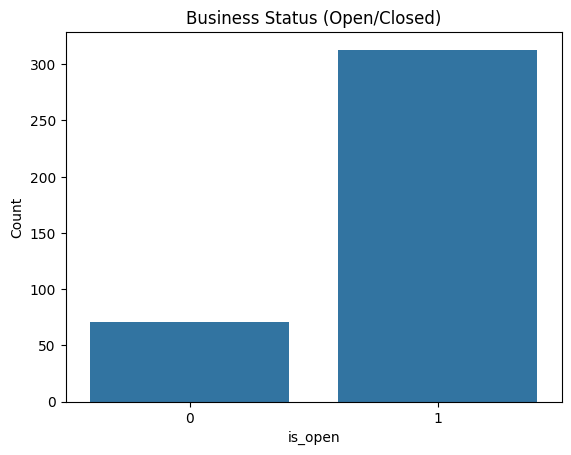

In [8]:
sns.countplot(data=df, x='is_open')
plt.title('Business Status (Open/Closed)')
plt.xlabel('is_open')
plt.ylabel('Count')
plt.show()

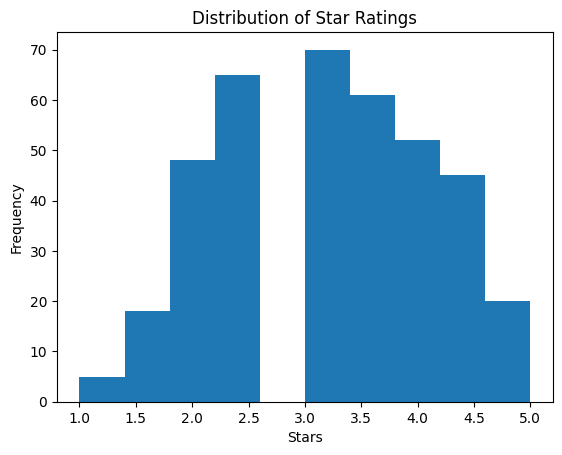

In [9]:
plt.hist(df['stars'])
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

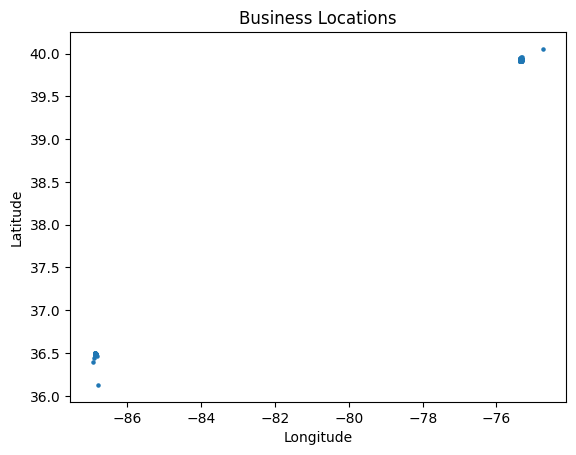

In [10]:
plt.scatter(df['longitude'], df['latitude'], s=5)
plt.title('Business Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
print(f'Number of unique categories: {df["categories"].nunique()}')

Number of unique categories: 354


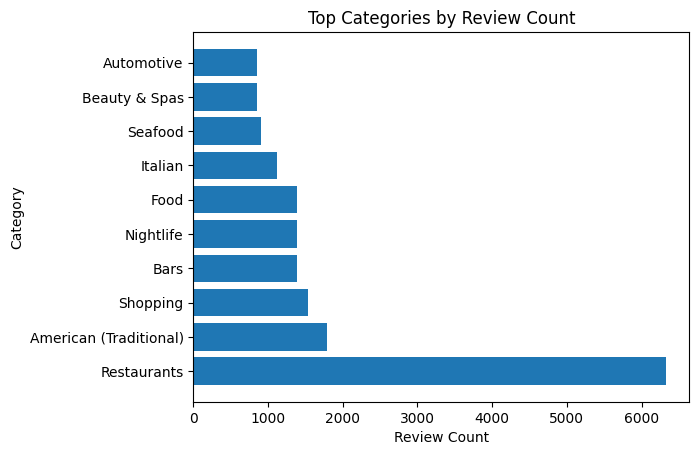

In [12]:
# Categories are separated by commas
# make the index the business id
categories = df['categories'].str.split(',').explode()
categories = categories.str.strip()
categories = categories[categories != '']

categories_df = pd.DataFrame(categories)

# Add the review_count to the categories (categories has an index from 0 to n)
categories_df = categories_df.join(df['review_count'], on=categories.index, how='inner')

# Get the top 10 categories by review count
top_categories = categories_df.groupby('categories')['review_count'].sum().nlargest(10)

plt.barh(top_categories.index, top_categories.values)
plt.title('Top Categories by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Category')
plt.show()

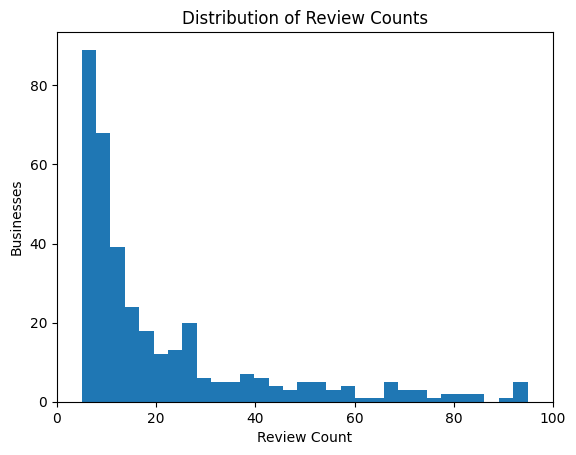

In [13]:
# reviews per business
plt.hist(df['review_count'], bins=100)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Businesses')
plt.xlim(0, 100)
plt.show()

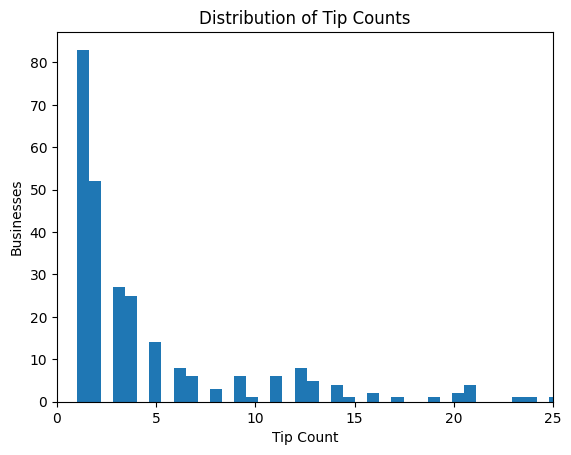

In [14]:
# tips per business
df_tips = pd.read_csv(f'../filtered_cities/{city}_tip.csv')
df_tips = df_tips.groupby('business_id').size()

plt.hist(df_tips, bins=100)
plt.title('Distribution of Tip Counts')
plt.xlabel('Tip Count')
plt.ylabel('Businesses')
plt.xlim(0, 25)
plt.show()

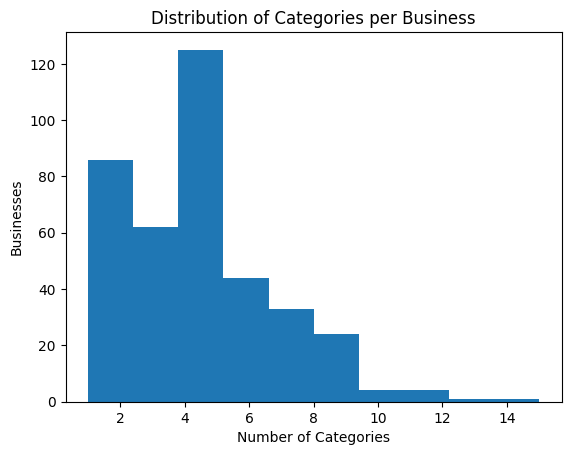

In [15]:
# number of categories per business
categories_per_business = df['categories'].str.split(',').apply(len)

plt.hist(categories_per_business, bins=10)
plt.title('Distribution of Categories per Business')
plt.xlabel('Number of Categories')
plt.ylabel('Businesses')
plt.show()

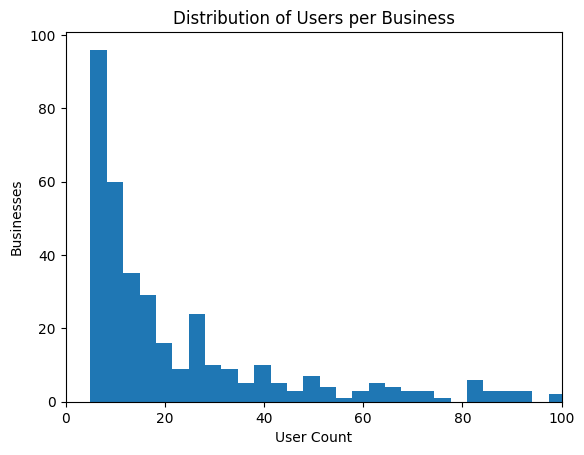

In [16]:
# users (y-axis) per business (x-axis)

df_reviews = pd.read_csv(f'../filtered_cities/{city}_review.csv')
df_tips = pd.read_csv(f'../filtered_cities/{city}_tip.csv')

df_reviews = df_reviews.groupby('business_id')['user_id'].nunique()
df_tips = df_tips.groupby('business_id')['user_id'].nunique()

df_users = df_reviews.add(df_tips, fill_value=0)

plt.hist(df_users, bins=100)
plt.title('Distribution of Users per Business')
plt.xlabel('User Count')
plt.ylabel('Businesses')
plt.xlim(0, 100)
plt.show()